### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import sparklyRGT as rgt 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


***

# 1) Load data into Python



In [2]:
#checks current working directory
os.getcwd()

#changes working directory to whatever is included in brackets
os.chdir("C:\\Users\\dexte\\sparklyRGT\\data") 

In [3]:
file_names = ['CH01_raw-free_S8-19.xlsx'] 

df = rgt.load_data(file_names)

df.head()


,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,MisrGT_A-cue,02/22/19,17:22:25,41,0,1,0,NaN,8,1.1,...,0,0,0,1,4,0,0,0,0,0
1,MisrGT_A-cue,02/22/19,17:22:25,41,0,1,0,NaN,8,1.1,...,0,0,0,1,1,0,0,0,0,0
2,MisrGT_A-cue,02/22/19,17:22:25,41,0,1,0,NaN,8,1.1,...,0,0,0,1,5,0,0,0,0,0
3,MisrGT_A-cue,02/22/19,17:22:25,41,0,1,0,NaN,8,1.1,...,0,0,0,1,5,0,0,0,0,0
4,MisrGT_A-cue,02/22/19,17:22:25,41,0,1,0,NaN,8,1.1,...,0,0,0,1,4,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis


In [18]:
cued = list(range(17,33)) #17 to 32

classic = list(range(1,17)) #1 to 16 

reverse = list(range(33,49)) #33-48

group_names = {0: 'cued',
              1: 'classic',
              2: 'reverse',} 

group_list = [cued, classic, reverse]

title = 'Plot' #for plotting

startsess = 8 #first session you would like to include in figures
endsess = 12 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [9]:
rgt.check_sessions(df)

Subject  StartDate            Session
1        2003-01-19 00:00:00  12          72.0
         2003-04-19 00:00:00  13          81.0
         2003-05-19 00:00:00  14          94.1
         2003-07-19 00:00:00  15          78.0
         2003-08-19 00:00:00  16          83.0
         2003-11-19 00:00:00  17          49.1
         2003-12-19 00:00:00  18          53.0
         02/22/19             8           69.1
         02/25/19             9           85.0
         02/26/19             10          75.0
         02/27/19             11          83.0
         03/13/19             19         103.0
2        2003-01-19 00:00:00  12          72.1
         2003-04-19 00:00:00  13          80.1
         2003-05-19 00:00:00  14          88.0
         2003-07-19 00:00:00  15          92.1
         2003-08-19 00:00:00  16          71.0
         2003-11-19 00:00:00  17          99.0
         2003-12-19 00:00:00  18          99.1
         02/22/19             8           57.0
         02/25/19     

### Drop/edit session numbers

In [12]:
df2 = rgt.drop_sessions(df, [6])
# df2 = rgt.edit_sessions(df, orig_sess = [0], new_sess = [2], subs = [58, 59, 60])

### Check that you dropped/edited the desired session(s)

In [13]:
rgt.check_sessions(df2) 

Subject  StartDate            Session
1        2003-01-19 00:00:00  12          72.0
         2003-04-19 00:00:00  13          81.0
         2003-05-19 00:00:00  14          94.1
         2003-07-19 00:00:00  15          78.0
         2003-08-19 00:00:00  16          83.0
         2003-11-19 00:00:00  17          49.1
         2003-12-19 00:00:00  18          53.0
         02/22/19             8           69.1
         02/25/19             9           85.0
         02/26/19             10          75.0
         02/27/19             11          83.0
         03/13/19             19         103.0
2        2003-01-19 00:00:00  12          72.1
         2003-04-19 00:00:00  13          80.1
         2003-05-19 00:00:00  14          88.0
         2003-07-19 00:00:00  15          92.1
         2003-08-19 00:00:00  16          71.0
         2003-11-19 00:00:00  17          99.0
         2003-12-19 00:00:00  18          99.1
         02/22/19             8           57.0
         02/25/19     

## Data processing

### Calculate variables for each rat


In [14]:
df_sum = rgt.get_summary_data(df) #change to df instead of df2 if you didn't do any session editing
df_sum 

,8P1,8P2,8P3,8P4,9P1,9P2,9P3,9P4,10P1,10P2,...,prem10,prem11,prem12,prem13,prem14,prem15,prem16,prem17,prem18,prem19
1,37.6812,31.8841,10.1449,20.2899,30.9524,40.4762,13.0952,15.4762,21.6216,43.2432,...,31.192661,20.952381,13.253012,20.588235,19.827586,23.529412,26.548673,61.111111,55.833333,21.374046
2,22.807,52.6316,12.2807,12.2807,40,42.8571,10,7.14286,39.3443,40.9836,...,47.413793,37.398374,47.014925,43.571429,34.814815,27.200000,38.793103,27.737226,22.834646,27.343750
3,69.8795,13.253,8.43373,8.43373,80,11.8182,3.63636,4.54545,86.1702,8.51064,...,33.333333,36.956522,39.230769,31.168831,27.407407,36.206897,39.024390,43.925234,59.701493,50.694444
4,10,68.3333,18.3333,3.33333,6.60377,85.8491,5.66038,1.88679,14.1509,74.5283,...,15.200000,11.538462,43.624161,16.197183,7.453416,15.094340,20.754717,9.316770,7.534247,2.395210
5,58.2278,6.32911,12.6582,22.7848,68.6869,12.1212,8.08081,11.1111,54.7945,12.3288,...,45.112782,39.097744,60.283688,45.185185,35.000000,42.068966,47.887324,39.860140,44.966443,24.113475
6,23.6559,44.086,27.957,4.30108,13.1868,59.3407,26.3736,1.0989,36.4583,45.8333,...,30.935252,14.285714,24.358974,38.853503,17.419355,16.339869,13.218391,31.515152,30.635838,20.689655
7,55.4217,31.3253,4.81928,8.43373,44,40,5.33333,10.6667,55.2381,35.2381,...,34.782609,27.272727,38.815789,17.808219,8.888889,9.202454,14.634146,8.860759,10.674157,8.527132
8,27.2727,38.6364,23.8636,10.2273,31.7647,52.9412,4.70588,10.5882,39.2523,51.4019,...,30.519481,29.761905,35.260116,45.086705,21.965318,20.915033,19.277108,32.500000,32.098765,27.108434
9,59.5745,14.8936,4.25532,21.2766,71.4286,14.2857,3.1746,11.1111,87.6289,5.15464,...,41.916168,NaN,49.358974,32.432432,33.552632,50.370370,50.000000,45.512821,45.333333,48.051948
10,45.122,9.7561,18.2927,26.8293,46.0317,9.52381,22.2222,22.2222,52.7027,6.75676,...,28.846154,NaN,49.541284,31.818182,41.428571,33.898305,50.000000,48.666667,62.328767,27.814570


### Get the risk status of the rats


In [ ]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

### Export your data to an Excel file 


In [ ]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = '', new_file_name = '', asin = True)

## Calculate means and SEMs for your experimental groups



In [15]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,8P1,8P2,8P3,8P4,9P1,9P2,9P3,9P4,10P1,10P2,...,prem10,prem11,prem12,prem13,prem14,prem15,prem16,prem17,prem18,prem19
cued,34.7043,31.7902,18.9756,14.53,33.8189,35.4255,15.9663,14.7892,30.4245,33.6812,...,36.2191,38.5268,41.7097,38.3388,38.4075,38.4153,42.0897,39.1706,37.5029,33.0943
classic,43.2353,29.5865,13.083,14.0952,46.0817,35.0348,8.51292,10.3705,52.4536,30.0974,...,36.8517,31.6131,41.4593,33.0446,29.0529,29.6845,36.877,33.634,35.7064,28.319
reverse,35.6771,35.1308,14.6972,14.4949,37.6169,33.3583,16.0363,12.9885,34.8871,40.3122,...,29.9683,42.2699,35.9331,34.7989,34.5787,36.2332,38.2743,41.8362,32.2326,32.9955


# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


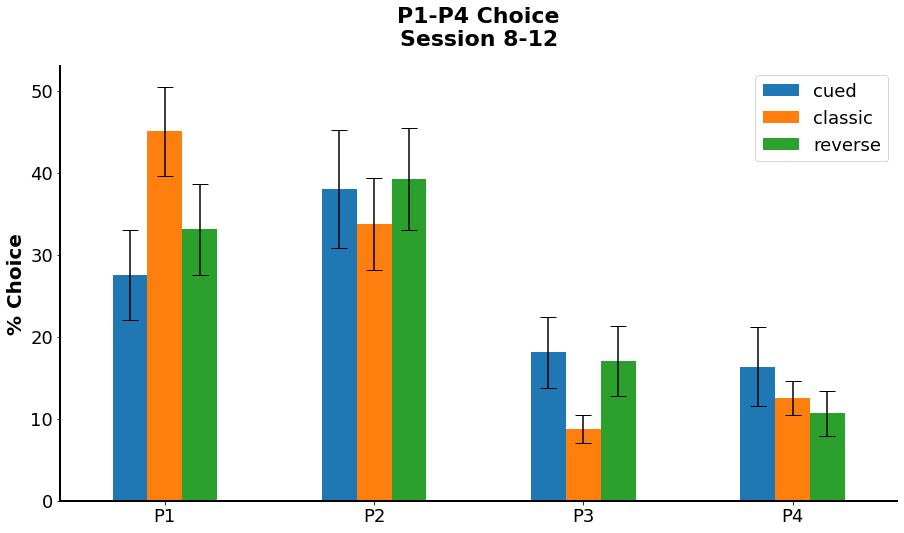

In [19]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)

#To save figure:
# plt.savefig('BH07 Choice S29-30',facecolor = 'white')

## Line plot of other variables


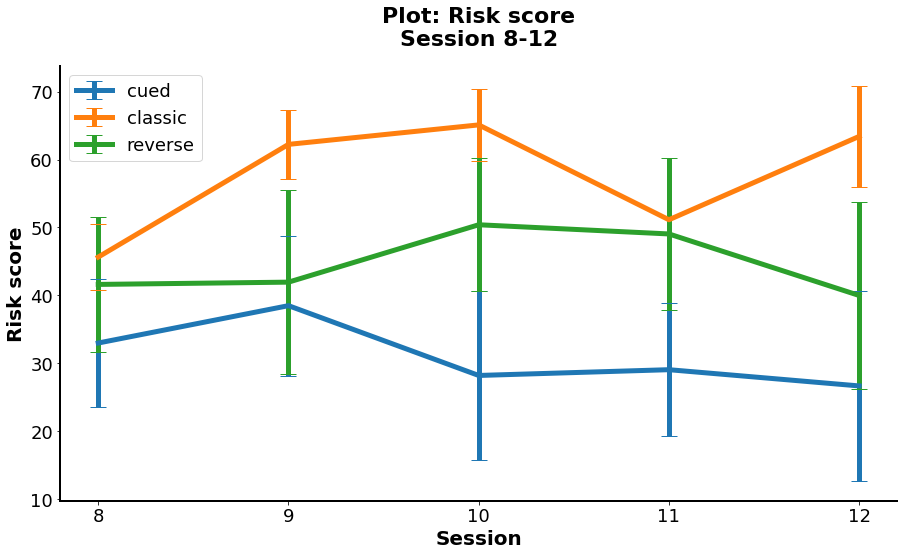

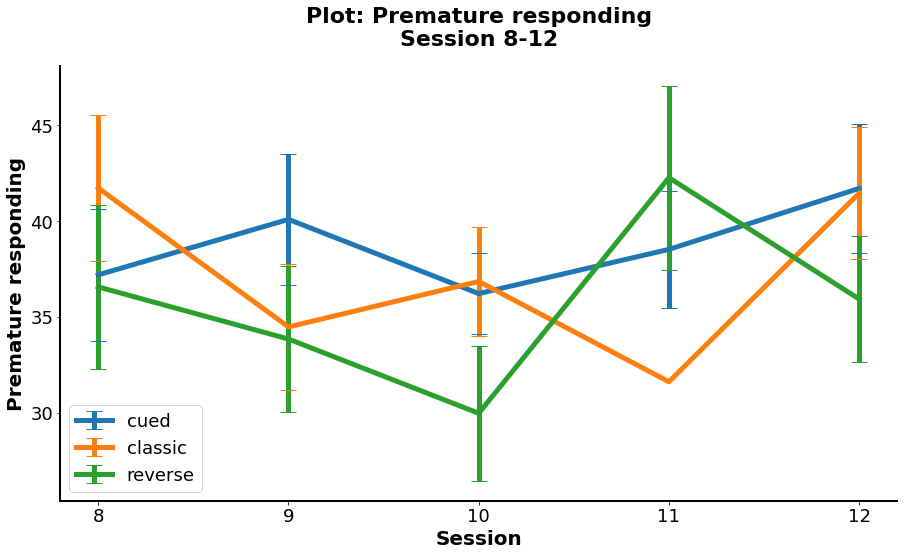

In [20]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding') 

## Bar plot of other variables



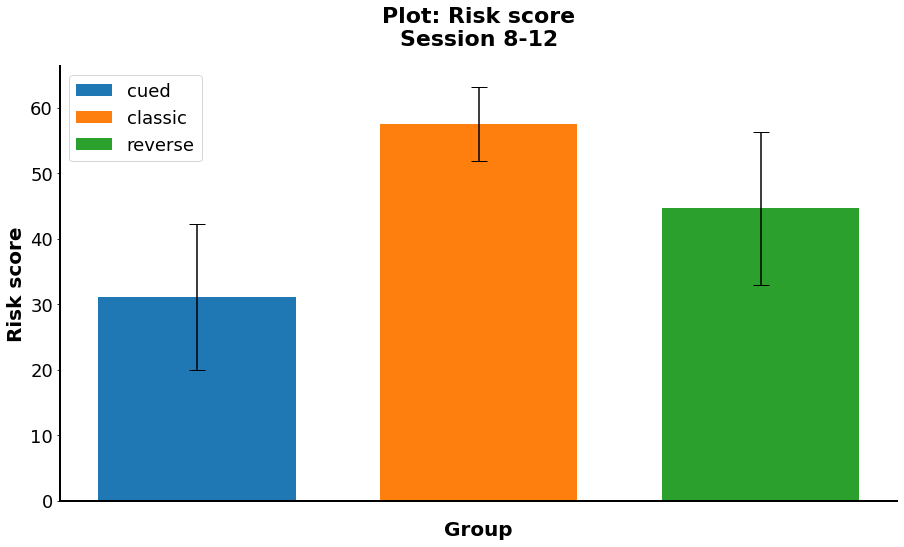

In [21]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score')